# Rejection Sampling

<img src='img/RejectionSampling.PNG' width='600'>

In [1]:
from matplotlib import pyplot as plt
from scipy.stats import laplace, gamma
import numpy as np

In [2]:
def laplace_pdf(x):
    """ Proposal Distribution """
    return laplace.pdf(x, loc=0.58, scale=10)

def gamma_pdf(x):
    """ Target Distribution """
    return gamma.pdf(x, a=6, loc=0, scale=2)

# Manera incorrecta

In [3]:
# Intervalo de las muestras x
LOW = 0
HIGH = 30

# calculamos SAMPLES puntos uniformemente distribuidos en el area bajo la curva laplace * 5.2
SAMPLES = 1000

# coordenada x distribuye uniforme
uni_samples_x = np.random.uniform(low=LOW, high=HIGH, size=SAMPLES)

# coordenada u distribuye uniforme dado x
uni_samples_u = [np.random.uniform(low=0, high=laplace_pdf(x_i)*5.2) for x_i in uni_samples_x]

uni_samples_x = []
uni_samples_u = []

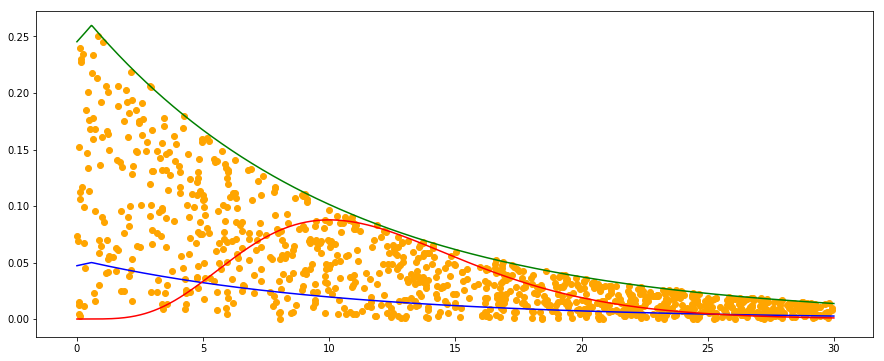

In [4]:
plt.figure(figsize=(15,6))
x = np.linspace(LOW, HIGH, 1000)
plt.plot(x, laplace_pdf(x), color='blue')
plt.plot(x, gamma_pdf(x), color='red')
plt.plot(x, laplace_pdf(x)*5.2, color='green')

plt.scatter(uni_samples_x, uni_samples_u, color='orange')

plt.show()

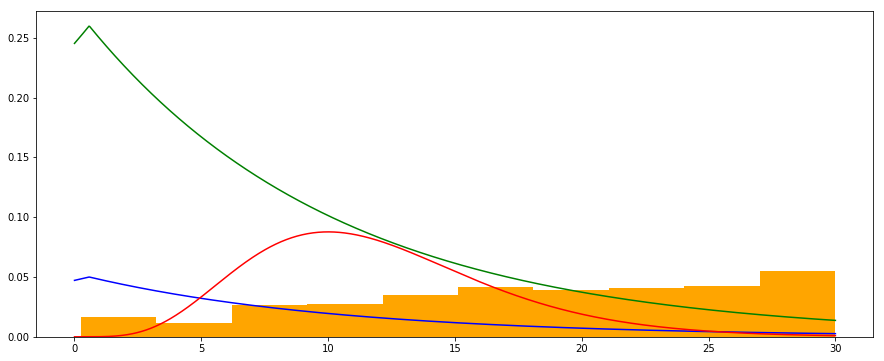

In [8]:
plt.figure(figsize=(15,6))
x = np.linspace(LOW, HIGH, 1000)
plt.plot(x, laplace_pdf(x), color='blue')
plt.plot(x, gamma_pdf(x), color='red')
plt.plot(x, laplace_pdf(x)*5.2, color='green')

# coordenada x distribuye uniforme
uni_samples_x = np.random.uniform(low=LOW, high=HIGH, size=SAMPLES)
# coordenada u distribuye uniforme dado x
uni_samples_u = [np.random.uniform(low=0, high=laplace_pdf(x_i)*5.2) for x_i in uni_samples_x]

x_below_f = [uni_samples_x[i] for i in range(len(uni_samples_x)) if uni_samples_u[i] < gamma_pdf(x[i])]

plt.hist([uni_samples_x[i] for i in range(len(uni_samples_x)) if uni_samples_u[i] < gamma_pdf(x[i])],
         color='orange', bins=bins, density=True)

hist, bins = np.histogram(x_below_f, density=True)

plt.show()

Vemos como los puntos se concentran donde la proposal es más baja. Esto es debido a que los puntos fueron generados uniformemente alrededor del eje x, mientras que debiesen haber sido generados según la probabilidad de la proposal.

# Manera Correcta

In [44]:
# Intervalo de las muestras x
LOW = 0
HIGH = 30

# calculamos SAMPLES puntos uniformemente distribuidos en el area bajo la curva laplace * 5.2
SAMPLES = 3000

# coordenada x distribuye uniforme
samples_x = laplace.rvs(loc=0.58, scale=10, size=SAMPLES)

# coordenada u distribuye uniforme dado x
uni_samples_u = [np.random.uniform(low=0, high=laplace_pdf(x_i)*5.2) for x_i in samples_x]

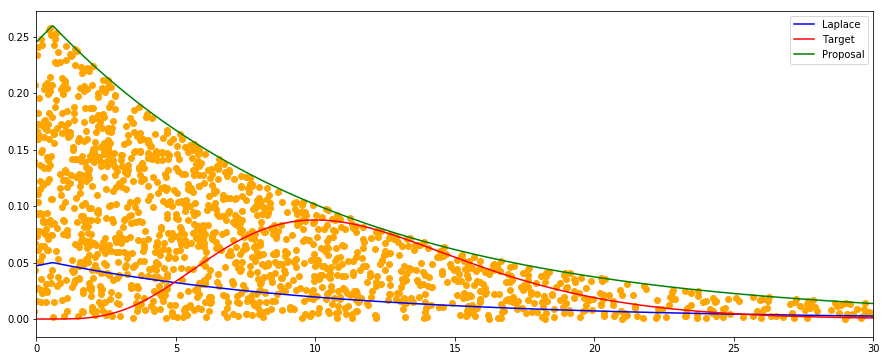

In [51]:
plt.figure(figsize=(15,6))
x = np.linspace(LOW, HIGH, 500)
plt.plot(x, laplace_pdf(x), color='blue', label='Laplace')
plt.plot(x, gamma_pdf(x), color='red', label='Target')
plt.plot(x, laplace_pdf(x)*5.2, color='green', label='Proposal')

plt.scatter(samples_x, uni_samples_u, color='orange')

plt.xlim(LOW, HIGH)
plt.legend()
plt.show()

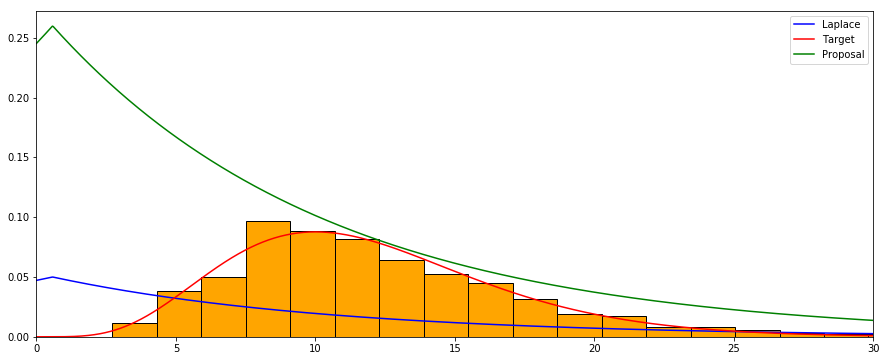

In [50]:
plt.figure(figsize=(15,6))
x = np.linspace(LOW, HIGH, 1000)
plt.plot(x, laplace_pdf(x), color='blue', label='Laplace')
plt.plot(x, gamma_pdf(x), color='red', label='Target')
plt.plot(x, laplace_pdf(x)*5.2, color='green', label='Proposal')

plt.hist(samples_x[uni_samples_u < gamma_pdf(samples_x)], edgecolor='black', color='orange', bins='auto', density=True)

plt.xlim(LOW, HIGH)
plt.legend()
plt.show()